### Observed versus expected cancer rates
Currently, I have two ways of calculating observed & expected rates on a drug:
- **Temporal matching**: compares the rate of cancer at different time periods within drug-taker's record (before drug to the period after drug, only for people with data for both before and after drug).
- **Person-matching**: For each person who took drug, find one or more people who never took drug.  Compare the rate of cancer in the drug-taker, after drug, to the matched person in the comparable time period.

## Temporal matching to calculate observed & expected cancer
Here, we calculate the "expected" rate of cancer by using the time range immediately before drug administration. It is important to only include people who have available data to avoid selection bias.  However, the more stringent you make this the fewer people are included.  

I use the following heuristic to define the time periods:
- Exposed period: the range of time from first dose to last dose, plus a "buffer window" to allow for delayed effects.  
- Unexposed period: a window of about the same size before the drug was taken.  If the patient is not observed for a this time period, the patient must be removed from the analysis.

We can play around with these and see if the results are consistent.  The windows are illustrated in the figure below.  

Questions:
- Cancer onset before versus after drug is mutually exclusive.  This seems wrong.
- We can't distinguish people who never would have been prescribed the drug..?

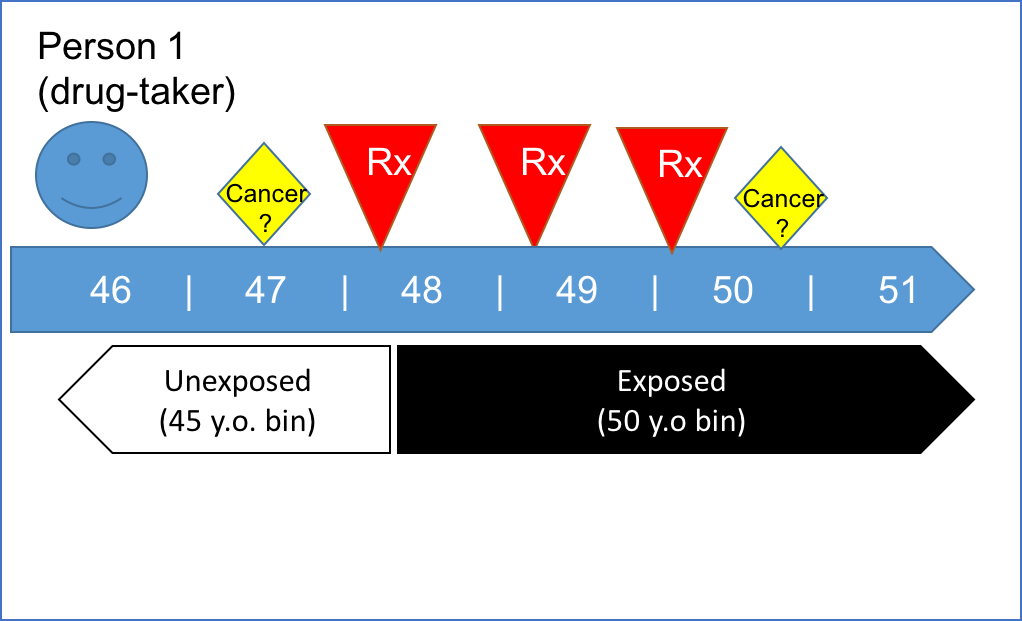

In [3]:
Image(filename='temporalmatching.png',width=500)

Then I calculate "Expected number of cancers":  $ E = { {\sum_{drug-takers} I(cancer in Unexposed Weeks)  } \over \sum_{drug-takers} \# unexposedWeeks } *  { \sum_{drug-takers} \# ExposedWeeks } $

And compare this to N = observed cancers in exposedWeeks.

Below, each point is one drug.  

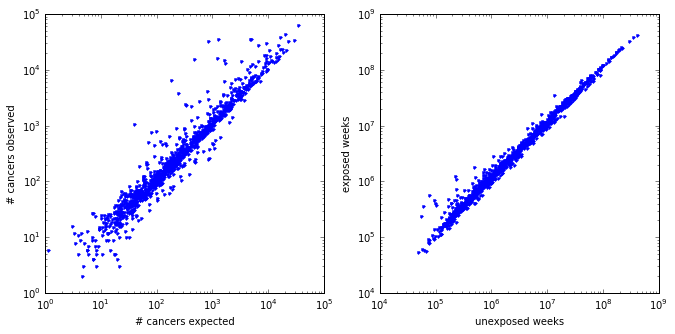

In [8]:
Image(filename='observed_expected.png',width=800)

## Comparing cancer incidence using RR or Gamma confidence intervals
In the formulation of DuMouchel for adverse events, for observed cancer rate $N_d$ and expected rate $E_d$, we want to calculate $ RR = \lambda_d = { \mu_d \over E_d } $:
- $ N_d \sim Poisson(\mu_d) = Poisson( \lambda_d * E_d ) $
- $ \lambda_d \sim \Gamma(\alpha, \beta) $ as a prior distribution

Then, using the Gamma-Poisson mixture, if you integrate out lambda, $ N_d \sim NegativeBinomial(\alpha, \beta, E_d ) $. Using empirical bayes, you get $\alpha, \beta $, and then you can get the posterior distribution for $lambda_d$:  $$ \lambda_d \sim \Gamma(\alpha + N_d, \beta + E_d) $$

First I use maximum likelihood of the pairs of $ (E_d, N_d) $ to get the empirical Bayes estimates.  I got $\alpha = 2.63, \beta = 1.75 $.  I doubt that the fancy empirical bayes is making much of a difference here!

Finally, you use the posterior $\Gamma $ distribution to get the outer percentiles estimates of RR.  They use EB05 = the .05 percentile of the distribution, and EB95 = the 95%.  If EB05 > 1.5 or EB95 < ... , is a rough cutoff. 

Below, each point is a drug again. These are plots from the spreadsheet `obsexp_temporal.xls`. The top two plots are measures of **increased risk of cancer**, the EB05.  Most of these seem to be cancer drugs, which I'm not sure I understand (why would the diagnosis happen more after the drug is administered?).  

The bottom 2 plots are measures of **reduced risk of cancer**.  I noticed in the spreadsheet that a lot of these are estrogen related drugs (plotted in magenta). Does diagnosis of cancer leads to taking these drugs?

I'm still looking through the results and trying to understand the orderings-- probably need to systematically identify cancer-treating drugs.  Here's an interesting drug that does not seem to be associated with cancer treatment: becaplermin  http://journals.lww.com/aswcjournal/pages/articleviewer.aspx?year=2011&issue=01000&article=00010&type=abstract

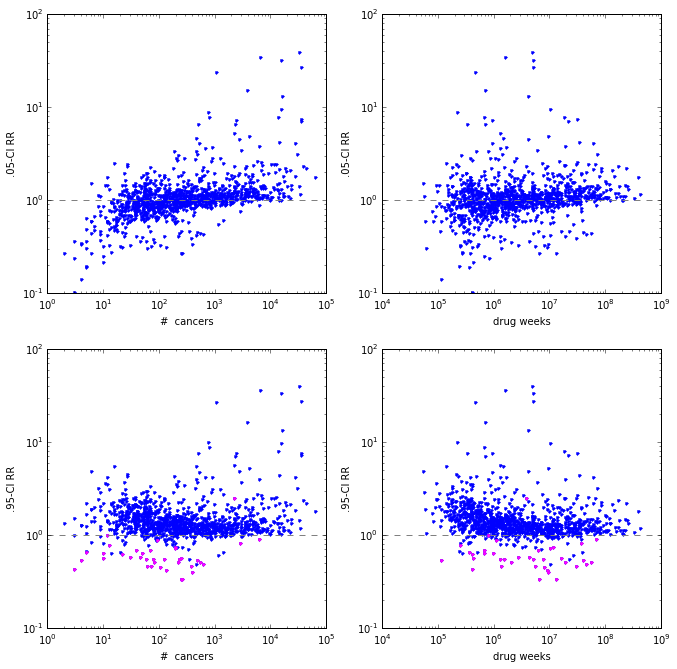

In [7]:
Image(filename='ebci.png',width=800)

In [1]:
from IPython.display import Image